### College of Computing and Informatics, Drexel University
---

# Exploratory Data Analysis

## Project Title: U.S. Domestic Flights Delay Prediction

## Author(s): Grace Pham, Jessica Jha, Heidi Tran, Khanh Tran

---

## 1. Introduction & Problem Definition
---

Millions of passengers fly everyday (except when a pandemic is taking place) and because flying is one of the fastest ways to travel, demand may get overwhelming, causing delays in departures and landings. Flight delays cause more than just inconvenience - it costs airlines and passegner money from rebooking flights, missing connecting flights, having to provide hotel and purchase food if the next flight is hours or days away. We hope to uncover certain trends from this data such as which airlines have the most delays, which destinations are most impacted, what are the causes of these delays, on average when are these delays happening the most, and build predictive classification models and compare which one can predict flight delays the best.

Using this data found from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) helps give insight into different factors at play when flights are delayed. This project utilized Apache Spark for downsizing the data and multiple Python libraries for pre-processing, EDA, visualizations, and predictive modeling. The results will benefit passengers to help plan their next itineraries and prepare the best plan of action to make sure their flights to their destination are as delay-free as possible.

## 3. Data
---
#### Main Dataset

The dataset was retrieved from IBM. The original dataset is 7.2 GB in size. This dataset provides information on roughly 200 million U.S. domestic flights on United States Bureau of Transportation Statistics along with the flights’ information including flight date, place of origin, destination, delay time, flight time, etc.

https://developer.ibm.com/exchanges/data/all/airline/

#### Airport Codes for Airline names
The list of airport codes was found on the Bureau of Transportation Statistics on the U.S. Department of Transportation site which was then copied into a CSV file to use to iterate through the list and replace the codes with Airline names to make better sense of the data. 
https://www.bts.gov/topics/airlines-and-airports/airline-codes

#### Metadata
- Fligts dataset
    - Format: CSV
    - Number of records: 194 million
    - Data Coverage: United States 1987 - 2020
    
- Airlines name dataset
    - Format: CSV 
    - Number of records: 1652 records

#### Downsize the data

In order to downsize the data, a local cluster of sample code from the IBM notebook was run on Apache Spark, an open-source cloud clustering platform. A smaller subset of data was able to be extracted so that all of our group members were able to have access to the same data to split pre-processing tasks. 

#### Glossary


| Field Name | Type | Description |
| --- | --- | --- |
| Year | int64 | year of the flight |
| Month | int64 | month of the flight  |
| DayofMonth | int64 | day of the month  |
| FlightDate | datetime64[ns] | date of the flight |
| Reporting_Airline | object | unique airline carrier code|
| DOT_ID_Reporting_Airline | int64 | Number assigned by US DOT to identify a unique airline |
| IATA_CODE_Reporting_Airline | object | Airline Code assigned by IATA |
| Tail_Number | object | Aircraft tail number |
| Flight_Number_Reporting_Airline | int64 | Flight Number |
| OriginAirportID | int64 | Origin Airport ID |
| OriginAirportSeqID | int64 | Origin Airport Sequence ID |
| OriginCityMarketID | int64 | Origin City Market ID |
| Origin | object | Origin Airport Code|
| OriginCityName | object | Origin City Name |
| OriginState | object | Origin State | 
| OriginStateFips | int64 | Origin State FIPS place code | 
| DestAirportID | int64 | Destination Airport ID |
| DestAirportSeqID | int64 | Destination Airport Sequence ID |
| OriginWac | int64 | Origin Airport World Area Code |
| DestCityMarketID | int64 | Destination City Market ID |
| Dest | object | Destination Airport Code |
| DestCityName | object | Destination City Name | 
| DestState | object | Destination State | 
| DestStateFips | int64 | Destination State FIPS code |
| DestStateName | object | Destination State Name |
| DestWac | int64 | Destination Airport World Area Code |
| CRSDepTime | int64 | Computer Reservation System (scheduled) Departure Time |
| DepTime | float64 | Departure Time (hhmm) |
| DepDelay | float64 | Departure delay (minutes) |
| DepDelayMinutes | float64 | Absolute value of DepDelay |
| DepartureDelayGroups | float64 | Departure delay 15 minute interval group |
| DepTimeBlk | object | Computer Reservation System (scheduled) time block |
| TaxiOut | float64 | Taxi out time (minutes) |
| WheelsOff | float64 | Wheels off time (local time, hhmm) |
| WheelsOn | float64 | Wheels on time (local time hhmm) |
| TaxiIn | float64 | Taxi in time (minutes) |
| CRSArrTime | int64 | Computer Reservation System (scheduled)
Arrival Time |
| ArrTime | float64 | Arrival time (local time, hhmm) |
| ArrDelay | float64 | Arrival delay (minutes) |
| ArrDelayMinutes | float64 | Absolute value of ArrDelay |
| ArrDel15 | float64 | Arrival Delay >15? |
| ArrivalDelayGroups | float64 | Arrival delay 15 minute  interval group |
| ArrTimeBlk | object | Computer Reservation System (scheduled) arrival time block |
| Cancelled | float64 | 1 = canceled |
| Diverted | float64 | 1 = diverted |
| CRSElapsedTime | float64 | Computer Reservation System (scheduled) elapsed time |
| ActualElapsedTime | float64 | Actual elapsed time |
| AirTime | float64 | Flight time (minutes) |
| Distance | float64 | Distance between airports (miles) |
| DistanceGroup | int64 | 250 mile distance interval group |
| CarrierDelay | float64 | Carrier delay (minutes) |
| WeatherDelay | float64 | Weather delay (minutes) |
| NASDelay | float64 | National Air System delay (minutes) |
| SecurityDelay | float64 | Security delay (minutes) |
| LateAircraftDelay | float64 | Late aircraft delay (minutes) |
| DivAirportLandings | int64 | Number of diverted airport landings |                     

### Import packages

In [ ]:
import sys
import json
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB # BernoulliNB is designed for binary features
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt
#from google.colab import data_table

# Ignore warnings in Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

# Config seaborn
sns.set(rc={"figure.figsize":(12, 10)})
sns.set_style('darkgrid')
sns.set_palette('Set2')

## 4. Common utilities that we can re-use.
Some of thehese functions were given to us by IBM sample notebook. We also wrote some original functions to re-use throughout the notebook as well.

In [ ]:
from re import I
def reduce_mem_usage(df: pd.DataFrame) -> pd.DataFrame:
    """Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
        I doubt that we would use up what Colab gives us in the free tier, but still it's a helpful util.
    :param df: pandas DataFrame    
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file: str, json=False) -> pd.DataFrame:
    """Create a dataframe and optimize its memory usage
    :param file: filepath.
    """
    if json:
        try:
            df = pd.read_json(file)
            df = reduce_mem_usage(df)
        except ValueError:
            df = pd.read_json(file, lines=True)
            df = reduce_mem_usage(df)
    elif not json:
        df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
        df = reduce_mem_usage(df)
    return df

    
def index_file_checker(df, col_name):
    return df[df[col_name].isnull()].index.tolist()


def check_field(df, col_name):
    """Check null percentage of a column
    """
    ind_miss = index_file_checker(df=df, col_name=col_name)
    
    if ind_miss == []:
        print("No Null values of {x}".format(x = col_name))
        if len(df) == len(df[col_name].unique()):
            print("All records of {x} is populated for the \"M Field\" and are unique".format(x = col_name))
            
    else:
        pctMissing = 100*(len(ind_miss)/len(df))
        print(f"Percentage of missing {col_name} field: {pctMissing:.2f}%")


def check_duplicate_values(df: pd.DataFrame, col_name: str =None):
    '''Check for duplicate values in a given column in a given dataframe. If no column is given, only check for duplicate rows in the dataframe.
    '''
    try:
        if col_name is not None:
            dups = df.duplicated(subset=[col_name], keep='first')
            len_dups = len(dups[dups==True])
            percent_dups = 100*len_dups/len(df)

            if len_dups == 0:
                print(f"\nNo duplicate values in {col_name} field.")
            elif len_dups > 0:
                print(f"\nPercentage of duplicate values in {col_name} field: {percent_dups}")
                print(f"Percentage of unique values in {col_name} field: {100-percent_dups}")
        elif col_name is None:
            dups = df.duplicated(keep='first')
            len_dups = len(dups[dups==True])
            percent_dups = 100*len_dups/len(df)
            
            if len_dups == 0:
                print(f"\nNo duplicate rows in dataframe.")
            elif len_dups > 0:
                print(f"\nPercentage of duplicate rows in dataframe: {percent_dups}")
                print(f"\nPercentage of unique rows in dataframe: {100-percent_dups}")
    except Exception as e:
        print(e)


def calculate_bound_values(df, col_name):
  ''' Calculate lower and upper bound value for given column in the dataframe
  '''
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return (lower_bound, upper_bound)


def check_outliers(df: pd.DataFrame, col_name: str = None):
  '''Print out information about the lower boundary, upper boundary and percentage of outliers
  '''
  lower_bound, upper_bound = calculate_bound_values(df, col_name)
  
  outliers_lower = df[col_name][df[col_name] < lower_bound]
  outliers_upper = df[col_name][df[col_name] > upper_bound]
  outliers_cnt = len(outliers_lower) + len(outliers_upper)
  outliers_pct = (outliers_cnt * 100) / len(df[col_name])
  print(f"Column: {col_name}. Lower boundary: {lower_bound}. Upper boundary: {upper_bound}. Percentage of outliers: {outliers_pct:.2f}%")


def remove_outliers(df, col_name):
  '''Replace outliers at given column with null values
  '''
  lower_bound, upper_bound = calculate_bound_values(df, col_name)
  df[col_name] = df[col_name][(df[col_name] < upper_bound) & (df[col_name] > lower_bound)]
  

def get_numeric_cols(df: pd.DataFrame):
  '''Return the names of all the numeric columns in a Data Frame
  '''
  return list(df.select_dtypes(include=[np.number]).columns.values)


def drop_col(df: pd.DataFrame, col_name: str = None) -> pd.DataFrame:
  '''Drop a column in a Data Frame and return the new Data Frame
  '''
  return df.drop(col_name, axis='columns')


def drop_cols_with_missing_val_threshold(df, threshold): 
  '''Drop columns which has percentage of missing value surpassed the input threshold
  Return a new dataframe in which unqualified columns has been dropped
  '''
  threshold_percentage = len(df) * threshold
  return df.dropna(thresh=threshold_percentage, axis=1)


def display_bar_char(xName: str, yName: str, df: pd.DataFrame, orient: str, figSize: (int, int), title: str):
    fig = plt.figure(figsize=figSize)
    ax = plt.axes()
    sns.barplot(x = xName, y = yName, data = df, orient = orient, ax = ax).set(title = title)


def plot_confusion_matrix(data, labels):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
    plt.title("Confusion Matrix")
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()

## 5. EDA
---

### 5.1 Summary Statistics
We'll run summary statistics for selected numeric fields which support our further analysis:

In [ ]:
airline_df.filter(items=['Departure_Delay', 'DepDelayMinutes', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'Arrival_Delay', 'ArrDelayMinutes', 'Elapsed_Time', 'AirTime', 'Distance']).describe(include=[np.number])

,Departure_Delay,DepDelayMinutes,TaxiOut,WheelsOff,WheelsOn,TaxiIn,Arrival_Delay,ArrDelayMinutes,Elapsed_Time,AirTime,Distance
count,378957.000000,378957.000000,378957.000000,378957.000000,378957.000000,378957.000000,378957.000000,378957.000000,378957.000000,378957.000000,378957.000000
mean,10.006394,12.984576,16.650266,1356.801951,1467.390406,7.510251,5.128577,13.161253,137.657903,113.497386,821.941376
std,42.863602,41.804844,9.376072,502.587266,528.392319,5.852117,45.167777,41.773267,74.163641,72.088507,606.969648
min,-82.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-91.000000,0.000000,15.000000,8.000000,31.000000
25%,-5.000000,0.000000,11.000000,932.000000,1049.000000,4.000000,-14.000000,0.000000,83.000000,60.000000,372.000000
50%,-2.000000,0.000000,14.000000,1341.000000,1506.000000,6.000000,-5.000000,0.000000,119.000000,94.000000,650.000000
75%,7.000000,7.000000,19.000000,1757.000000,1913.000000,9.000000,8.000000,8.000000,169.000000,144.000000,1062.000000
max,1878.000000,1878.000000,168.000000,2400.000000,2400.000000,224.000000,1898.000000,1898.000000,713.000000,684.000000,5095.000000


### 5.2 How often are flights delayed?
#### On departure

In [ ]:
# Calculate the total count of departure flights from all airports
total_dep_flights = airline_df['Flight_Number_Airline'].count()
# Calculate the total count of 'Delayed' departure flights from all airports
total_delayed_dep_flights = airline_df['Flight_Number_Airline'].loc[airline_df['IsDepDelay'] == 1].count()

In [ ]:
# Percentage of flights being delayed on departure
p_delayed_dep = round((total_delayed_dep_flights/total_dep_flights)*100, 2)
print(f"{p_delayed_dep}% of flights delayed on departure")

36.01% of flights delayed on departure


#### On arrival

In [ ]:
# Calculate the total count of arrival flights from all airports
total_arr_flights = airline_df['Flight_Number_Airline'].count()
# Calculate the total count of 'Delayed' arrival flights from all airports
total_delayed_arr_flights = airline_df['Flight_Number_Airline'].loc[airline_df['IsArrDelay'] == 1].count()

In [ ]:
# Percentage of flights being delayed on arrival
p_delayed_arr = round((total_delayed_arr_flights/total_arr_flights)*100, 2)
print(f"{p_delayed_arr}% of flights delayed on arrival")

36.29% of flights delayed on arrival


We can see that the percentage of flights being delayed on arrival and on departure are roughly similar, both are having around over 36% of delayed flights.

### 5.3. Airports with most number of flights
#### From departure airports:

In [ ]:
number_of_flight_dep = airline_df.groupby('OriginAirport')['Flight_Number_Airline'].count().reset_index(name = 'Total Flights')
top10_number_of_flight_dep = number_of_flight_dep.sort_values('Total Flights',ascending = False).head(10)
top10_number_of_flight_dep

,OriginAirport,Total Flights
21,ATL,23253
257,ORD,17590
97,DFW,15035
96,DEN,13875
196,LAX,13095
319,SFO,10306
272,PHX,10038
170,IAH,9669
76,CLT,9392
194,LAS,9330


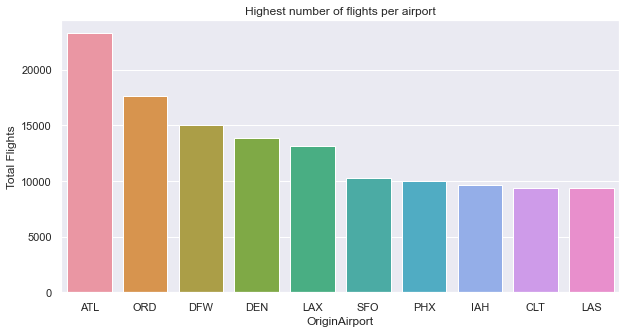

In [ ]:
display_bar_char('OriginAirport', 'Total Flights', top10_number_of_flight_dep, 'v', (10, 5), "Highest number of flights per airport")

- We can see from here that airport ATL is the one with the highest number of departure flights of over 23000 flights recorded.
- Airports SFO, PHX, IAH, CLT, LAS are also the ones which made it to the top 10 of highest number of departure flights, but their total flights are around 10,000 flights only, which is about half of the number of flights from airport ATL

#### From arrival airports:

In [ ]:
number_of_flight_arr = airline_df.groupby('DestAirport')['Flight_Number_Airline'].count().reset_index(name = 'Total Flights')
top10_number_of_flight_arr = number_of_flight_arr.sort_values('Total Flights',ascending = False).head(10)
top10_number_of_flight_arr

,DestAirport,Total Flights
21,ATL,23163
256,ORD,17941
97,DFW,15117
96,DEN,13836
195,LAX,13358
318,SFO,10516
271,PHX,10115
169,IAH,9589
193,LAS,9433
76,CLT,9279


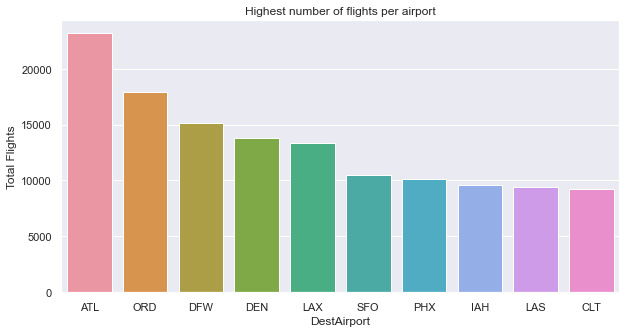

In [ ]:
display_bar_char('DestAirport', 'Total Flights', top10_number_of_flight_arr, 'v', (10, 5), "Highest number of flights per airport")

- We can see from here that airport ATL is also the one with the highest number of arrival flights of over 23000 flights recorded. It marked the huge differences when comparing to other airports in top 10.
- Airports SFO, PHX, IAH, CLT, LAS are also the ones which made it to the top 10 of highest number of departure flights, but their total flights are around 10,000 flights only, which is about half of the number of flights from airport ATL

#### Map Visualization for 5 & 6:
Origins/Destinations Arrival and Departure (rc)
https://public.tableau.com/app/profile/j.jha/viz/Info442-Maps/Story1

### 5.4 Airports with highest frequency of delay
#### On departure

In [ ]:
dep_delay_freq = airline_df.groupby('OriginAirport')['IsDepDelay'].sum().reset_index(name = 'Total Departure Delays')
top10_dep_delay_freq = dep_delay_freq.sort_values('Total Departure Delays',ascending = False).head(10)
top10_dep_delay_freq

,OriginAirport,Total Departure Delays
21,ATL,8479
257,ORD,6940
96,DEN,5896
97,DFW,5775
196,LAX,5360
194,LAS,4095
319,SFO,4017
272,PHX,3842
76,CLT,3438
170,IAH,3375


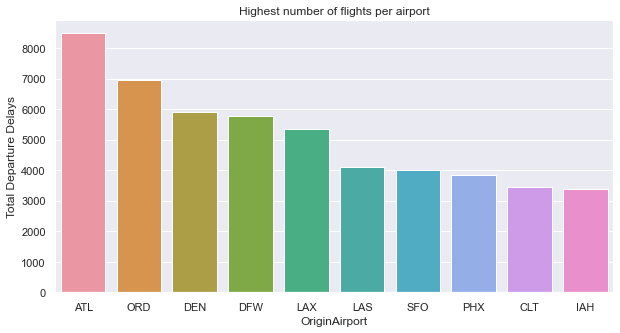

In [ ]:
display_bar_char('OriginAirport', 'Total Departure Delays', top10_dep_delay_freq, 'v', (10, 5), "Highest number of flights per airport")

We can see here that ATL is the airport with highest number of flights being delayed. But does this mean the rate of delay in ATL airport is also high? Let's look at the percentage of delayed flights per airport below:

In [ ]:
# Calculate delay percentage for departure flights in top 10 airports with highest delayed flight count
delay_percentages = []
for index, row in top10_dep_delay_freq.iterrows():
    airport = row["OriginAirport"]
    total_delay = row["Total Departure Delays"]
    total_flight = number_of_flight_dep["Total Flights"].loc[number_of_flight_dep["OriginAirport"] == airport].values[0]
    # Calculate delay departure percentage for an airport
    delay_percentage = round((total_delay/total_flight)*100, 2)
    # Append calculated percentage to the list
    delay_percentages.append(delay_percentage)
delay_percentages # List of percentage for flight delay in top 10 highest delayed flight airports

[36.46, 39.45, 42.49, 38.41, 40.93, 43.89, 38.98, 38.27, 36.61, 34.91]

In [ ]:
# Create a new column in data frame top10_dep_delay_freq
top10_dep_delay_freq["Delay Percentage"] = delay_percentages

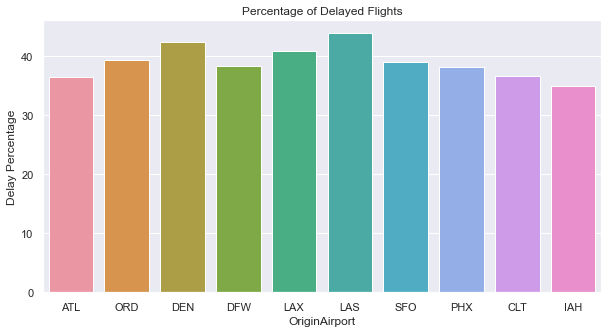

In [ ]:
display_bar_char('OriginAirport', 'Delay Percentage', top10_dep_delay_freq, 'v', (10, 5), "Percentage of Delayed Flights")

- After calculating the percentage, we can see that although ATL is the airport with highest number of delayed flights, its percentage of delayed flights is one of the lowest this top 10 highest delay flight counts.
- On the other hand, LAS airport, which was having only 4,000 delayed flights recorded, actually have the highest rate of delay (approximately 44%)

#### On arrival

In [ ]:
arr_delay_freq = airline_df.groupby('DestAirport')['IsArrDelay'].sum().reset_index(name = 'Total Arrival Delays')
top10_arr_delay_freq = arr_delay_freq.sort_values('Total Arrival Delays',ascending = False).head(10)
top10_arr_delay_freq

,DestAirport,Total Arrival Delays
21,ATL,6993
256,ORD,6613
97,DFW,5515
195,LAX,5383
96,DEN,4769
318,SFO,4418
271,PHX,3820
193,LAS,3502
169,IAH,3303
76,CLT,3091


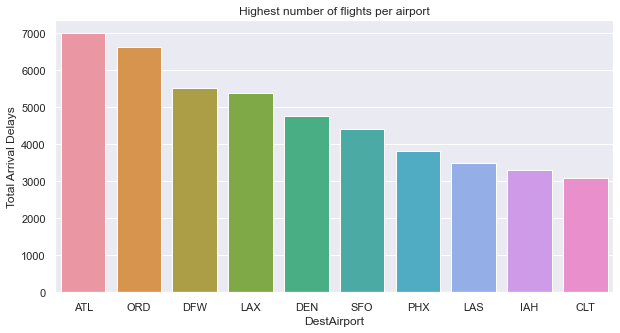

In [ ]:
display_bar_char('DestAirport', 'Total Arrival Delays', top10_arr_delay_freq, 'v', (10, 5), "Highest number of flights per airport")

- We can see that the top 10 airports with highest counts of delayed arrival flights is the same of top 10 airport with most delayed departure flights
- For either departure or arrival flights, ATL airport is still the one with highest number of flight being delayed. However, the number of delayed arrival flights is around 7,000 flights, which is less than that of departure flights, which is at over 8,00 flights.
- Aiport IAH and CLT are also one of the airports with least number of delayed flight in the top 10 with highest delayed. For arrival flights, they had around 3,000 delayed flight, which is less than half of that in ATL.

Let's look at the percentage of delayed flights per airport to see which airport will have highest delayed arrival flight percentage below:

In [ ]:
# Calculate delay percentage for arrival flights in top 10 airports with highest delayed flight count
delay_percentages = []
for index, row in top10_arr_delay_freq.iterrows():
    airport = row["DestAirport"]
    total_delay = row["Total Arrival Delays"]
    total_flight = number_of_flight_arr["Total Flights"].loc[number_of_flight_arr["DestAirport"] == airport].values[0]
    # Calculate delay arrival percentage for an airport
    delay_percentage = round((total_delay/total_flight)*100, 2)
    # Append calculated percentage to the list
    delay_percentages.append(delay_percentage)
delay_percentages # List of percentage for flight delay in top 10 highest delayed flight airports

[30.19, 36.86, 36.48, 40.3, 34.47, 42.01, 37.77, 37.12, 34.45, 33.31]

In [ ]:
# Create a new column in data frame top10_arr_delay_freq
top10_arr_delay_freq["Delay Percentage"] = delay_percentages

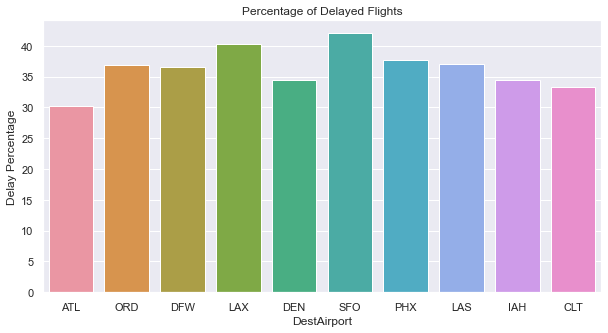

In [ ]:
display_bar_char('DestAirport', 'Delay Percentage', top10_arr_delay_freq, 'v', (10, 5), "Percentage of Delayed Flights")

- Surprisingly, although ATL is the airport with highest number of delayed flights, its percentage of delayed flights is actually the lowest in this top 10 highest delay flight counts. This may be because ATL is a large airport with a huge number of arrival/departure flights.
- SFO airport, which has the second highest in percentage of departure flight delayed, is the airport with highest arrival flights delayed! The statistics suggest that over 41% of flights to SFO will be delayed.

### 5.5 Airports with high mean delay in minutes? 
#### On departure

In [ ]:
airline_df.groupby('OriginAirport')['DepDelayMinutes'] \
    .mean() \
    .reset_index(name = 'Mean delay (minutes)') \
    .sort_values('Mean delay (minutes)', ascending = False).head()

#CYS -> Cheyenne Regional Airport (Wyoming), Cheyenne Regional Airport is a civil-military airport
#OGS -> Ogdensburg International Airport (NY)
#SLN - > Salina Regional Airport (Kansas)
#HYA -> Cape Cod Gateway Airport (Massachusetts)
#PSM -> Portsmouth International Airport at Pease (New Hampshire)

,OriginAirport,Mean delay (minutes)
90,CYS,233.600000
252,OGS,167.111111
329,SLN,101.642857
166,HYA,80.333333
286,PSM,80.166667


#### On arrival

In [ ]:
airline_df.groupby('DestAirport')['ArrDelayMinutes'] \
    .mean() \
    .reset_index(name = 'Mean delay (minutes)') \
    .sort_values('Mean delay (minutes)', ascending = False).head()

#OTH -> Southwest Oregon Regional Airport
#CGI -> Cape Girardeau Regional Airport (Missouri)
#JMS -> Jamestown Regional Airport (North Dakota)
#OGS -> Ogdensburg International Airport (New York)
#SWO -> Stillwater Regional Airport (Oklahoma)

,DestAirport,Mean delay (minutes)
259,OTH,48.733333
65,CGI,42.045455
187,JMS,40.157895
251,OGS,39.181818
344,SWO,38.571429


### 5.6 Airlines with highest number of flights?  

In [ ]:
airport_numFlights = airline_df[['Airline_Name', 'FlightDate']]
airport_numFlights = airport_numFlights.groupby(by='Airline_Name').count()
airport_numFlights = airport_numFlights.sort_values(by=['FlightDate'], ascending=False)
a1 = airport_numFlights.head(10).reset_index()
a1

,Airline_Name,FlightDate
0,Southwest Airlines Co.,78711
1,Delta Air Lines Inc.,56138
2,American Airlines Inc.,49964
3,SkyWest Airlines Inc.,41704
4,United Air Lines Inc.,34082
5,ExpressJet Airlines Inc.,23881
6,JetBlue Airways,16968
7,Envoy Air,12814
8,Alaska Airlines Inc.,12192
9,Spirit Air Lines,7914


Text(0, 0.5, 'Number of Flights')

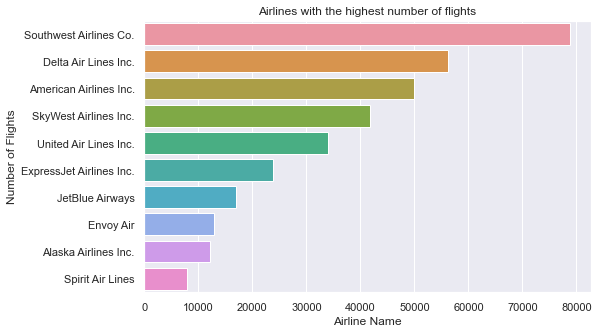

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes()
sns.barplot(y = a1.Airline_Name, x = a1.FlightDate, data = a1, orient = 'h', ax = ax) \
.set(title = 'Airlines with the highest number of flights')
plt.xlabel('Airline Name')
plt.ylabel('Number of Flights')

### 5.7 Airlines with highest freq delay? 

The same top 10 airlines appear in all 3 analyses, with varied order. The top 3 are Southwest Airlines, Delta Airlines, and American Airlines. (RC)

#### On departure

In [ ]:
airline_depDelay = airline_df[['Airline_Name', 'Departure_Delay']]
airline_depDelay = airline_depDelay.groupby(by='Airline_Name').count()
airline_depDelay = airline_depDelay.sort_values(by=['Departure_Delay'], ascending=False)
a2 = airline_depDelay.head(10).reset_index()
a2

,Airline_Name,Departure_Delay
0,Southwest Airlines Co.,78711
1,Delta Air Lines Inc.,56138
2,American Airlines Inc.,49964
3,SkyWest Airlines Inc.,41704
4,United Air Lines Inc.,34082
5,ExpressJet Airlines Inc.,23881
6,JetBlue Airways,16968
7,Envoy Air,12814
8,Alaska Airlines Inc.,12192
9,Spirit Air Lines,7914


Text(0, 0.5, 'Number of Departure Delays')

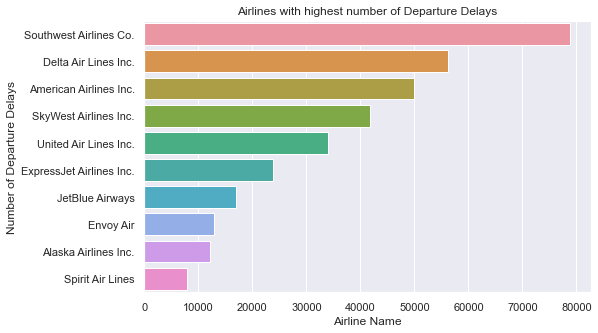

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes()
sns.barplot(y = a2.Airline_Name, x = a2.Departure_Delay, data = a2, orient = 'h', ax = ax) \
.set(title = 'Airlines with highest number of Departure Delays')
plt.xlabel('Airline Name')
plt.ylabel('Number of Departure Delays')

In [ ]:
### percentages 

freq_depDelay = airline_df[['Airline_Name', 'IsDepDelay']]
freq_depDelay = freq_depDelay.groupby(by='Airline_Name')
freq_depDelay.head()
freq_depDelay = freq_depDelay['IsDepDelay'].value_counts(normalize=True).mul(100).astype(str)+'%'
freq_depDelay = freq_depDelay.rename('Percentage_of_Flights_Delayed_on_Departure').reset_index()

freq_depDelay = freq_depDelay[freq_depDelay['Airline_Name'].str.contains('Southwest|Delta|American|SkyWest|United|Express|Jet|Alaska|Envoy|Spirit', na=False)]

freq_depDelay = freq_depDelay.sort_values(by='Percentage_of_Flights_Delayed_on_Departure', )


freq_depDelay.drop(['IsDepDelay'], axis = 1).head(10)

,Airline_Name,Percentage_of_Flights_Delayed_on_Departure
3,Alaska Airlines Inc.,27.903543307086615%
29,SkyWest Airlines Inc.,28.28985229234606%
9,Delta Air Lines Inc.,31.49025615447647%
15,ExpressJet Airlines Inc.,31.82446296218751%
13,Envoy Air,33.088809115030436%
33,Spirit Air Lines,34.58428102097549%
7,American Airlines Inc.,34.700984708990475%
37,United Air Lines Inc.,38.304676955577726%
21,JetBlue Airways,40.21098538425271%
31,Southwest Airlines Co.,47.891654279579726%


You're most likely to be delayed on take-off if you're riding Southewest, JetBlue, and United (even though Southwest, Delta, and American Airlines have the most delayed departures  by total flights compared to their competitors - which is probably just an indicator that the top 3 are the most popular so they would have more delayed flights compared to a smaller airline who doesn't give many flights overall). 

#### On arrival

In [ ]:
airport_arrDelay = airline_df[['Airline_Name', 'Arrival_Delay']]
airport_arrDelay = airport_arrDelay.groupby(by='Airline_Name').count()
airport_arrDelay = airport_arrDelay.sort_values(by=['Arrival_Delay'], ascending=False)
a3 = airport_arrDelay.head(10).reset_index()
a3

,Airline_Name,Arrival_Delay
0,Southwest Airlines Co.,78711
1,Delta Air Lines Inc.,56138
2,American Airlines Inc.,49964
3,SkyWest Airlines Inc.,41704
4,United Air Lines Inc.,34082
5,ExpressJet Airlines Inc.,23881
6,JetBlue Airways,16968
7,Envoy Air,12814
8,Alaska Airlines Inc.,12192
9,Spirit Air Lines,7914


Text(0, 0.5, 'Number of Arrival Delays')

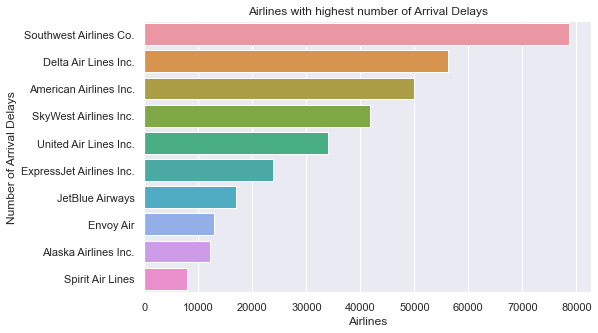

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes()
sns.barplot(y = a3.Airline_Name, x = a3.Arrival_Delay, data = a3, orient = 'h', ax = ax) \
.set(title = 'Airlines with highest number of Arrival Delays')
plt.xlabel('Airlines')
plt.ylabel('Number of Arrival Delays')

In [ ]:
### percentages arrival delay

freq_arrDelay = airline_df[['Airline_Name', 'IsArrDelay']]
freq_arrDelay = freq_arrDelay.groupby(by='Airline_Name')
freq_arrDelay.head()
freq_arrDelay = freq_arrDelay['IsArrDelay'].value_counts(normalize=True).mul(100).astype(str)+'%'
freq_arrDelay = freq_arrDelay.rename('Percentage_of_Flights_Delayed_on_Arrival').reset_index()

freq_arrDelay

freq_arrDelay = freq_arrDelay[freq_arrDelay['Airline_Name'].str.contains('Southwest|Delta|American|SkyWest|United|Express|Jet|Alaska|Envoy|Spirit', na=False)]
freq_arrDelay = freq_arrDelay.sort_values(by='Percentage_of_Flights_Delayed_on_Arrival')
freq_arrDelay.drop(['IsArrDelay'], axis = 1).head(10)


,Airline_Name,Percentage_of_Flights_Delayed_on_Arrival
9,Delta Air Lines Inc.,28.811143966653603%
37,United Air Lines Inc.,34.31723490405493%
3,Alaska Airlines Inc.,35.25262467191601%
29,SkyWest Airlines Inc.,36.04210627277959%
33,Spirit Air Lines,36.46702047005307%
7,American Airlines Inc.,37.55103674645745%
15,ExpressJet Airlines Inc.,37.97998408776852%
31,Southwest Airlines Co.,39.43540292970487%
21,JetBlue Airways,39.816124469589816%
13,Envoy Air,40.643046667707196%


We can see that Envoy Air, Jet Blue Airways, and Southwest Airlines are the biggest offenders of having delayed flights when you're flight is going to arrive. Even though Delta is ranked #2 and United #3 for having the most delayed flights by raw count, they are actaully the airlines with most infrequent delayed flights on arrival (which is good for whoever is picking you up from the airport!)  

### 5.8 Airlines with high mean delay in minutes? 
#### On departure

In [ ]:
airline_df.groupby('Airline_Name')['DepDelayMinutes'] \
    .mean() \
    .reset_index(name = 'Mean delay (minutes)') \
    .sort_values('Mean delay (minutes)', ascending = False).head()

,Airline_Name,Mean delay (minutes)
10,JetBlue Airways,18.448668
8,Frontier Airlines Inc.,17.633449
2,Allegiant Air,16.872012
11,Mesa Airlines Inc.,16.870638
12,PSA Airlines Inc.,16.076978


#### On arrival

In [ ]:
airline_df.groupby('Airline_Name')['ArrDelayMinutes'] \
    .mean() \
    .reset_index(name = 'Mean delay (minutes)') \
    .sort_values('Mean delay (minutes)', ascending = False).head()

,Airline_Name,Mean delay (minutes)
10,JetBlue Airways,18.433522
8,Frontier Airlines Inc.,18.009002
2,Allegiant Air,17.751494
11,Mesa Airlines Inc.,17.651700
7,ExpressJet Airlines Inc.,16.393535


### 5.9 Origin with highest freq delay? 
#### On departure

In [ ]:
or_DepDelay = airline_df[['OriginAirport', 'Departure_Delay']]
or_DepDelay = or_DepDelay.groupby(by='OriginAirport').count()
or_DepDelay = or_DepDelay.sort_values(by=['Departure_Delay'], ascending=False)
o2 = or_DepDelay.head(10).reset_index()
o2

,OriginAirport,Departure_Delay
0,ATL,23253
1,ORD,17590
2,DFW,15035
3,DEN,13875
4,LAX,13095
5,SFO,10306
6,PHX,10038
7,IAH,9669
8,CLT,9392
9,LAS,9330


In [ ]:
### percentages origin departure
o1_freq_dep = airline_df[['OriginAirport', 'IsDepDelay']]
o1_freq_dep = o1_freq_dep.groupby(by='OriginAirport')
o1_freq_dep.head()
o1_freq_dep = o1_freq_dep['IsDepDelay'].value_counts(normalize=True).mul(100).astype(str)+'%'
o1_freq_dep = o1_freq_dep.rename('Percentage_of_Flights_Delayed_on_Departure').reset_index()
o1_freq_dep

o1_freq_dep = o1_freq_dep[o1_freq_dep['OriginAirport'].str.contains('LAX|ATL|ORD|DFW|DEEN|PHX|SFO|IAH|CLT|LAS', na=False)]
o1_freq_dep = o1_freq_dep.sort_values(by='Percentage_of_Flights_Delayed_on_Departure')
o1_freq_dep.head(9)

,OriginAirport,IsDepDelay,Percentage_of_Flights_Delayed_on_Departure
336,IAH,True,34.90536766987279%
41,ATL,True,36.464112157571066%
149,CLT,True,36.60562180579217%
538,PHX,True,38.27455668459853%
191,DFW,True,38.41037578982374%
631,SFO,True,38.97729477973996%
508,ORD,True,39.45423536100057%
388,LAX,True,40.931653302787325%
384,LAS,True,43.89067524115756%


The origin that has the highest delayed departure is Las Vegas with 43.9%, then Los Angeles, CA with 40.9&, and Chicago, IL (O'Hare) at 39.5% 


-> aka if you fly out from L.A. you will have a 41% chance of delayed departure.


#### On arrival

In [ ]:
or_ArrDelay = airline_df[['OriginAirport', 'Arrival_Delay']]
or_ArrDelay = or_ArrDelay.groupby(by='OriginAirport').count()
or_ArrDelay = or_ArrDelay.sort_values(by=['Arrival_Delay'], ascending=False)
o3 = or_ArrDelay.head(10).reset_index()
o3

,OriginAirport,Arrival_Delay
0,ATL,23253
1,ORD,17590
2,DFW,15035
3,DEN,13875
4,LAX,13095
5,SFO,10306
6,PHX,10038
7,IAH,9669
8,CLT,9392
9,LAS,9330


In [ ]:
### percentages - origin arrival delay

a1_freq_arr = airline_df[['OriginAirport', 'IsArrDelay']]
a1_freq_arr = a1_freq_arr.groupby(by='OriginAirport')
a1_freq_arr.head()
a1_freq_arr = a1_freq_arr['IsArrDelay'].value_counts(normalize=True).mul(100).astype(str)+'%'
a1_freq_arr = a1_freq_arr.rename('Percentage_of_Flights_Delayed_on_Arrival').reset_index()
a1_freq_arr


a1_freq_arr = a1_freq_arr[a1_freq_arr['OriginAirport'].str.contains('LAX|ATL|ORD|DFW|DEN|PHX|SFO|IAH|CLT|LAS', na=False)]
a1_freq_arr = a1_freq_arr.sort_values(by='Percentage_of_Flights_Delayed_on_Arrival')

a1_freq_arr.drop(['IsArrDelay'], axis = 1).head(10)

,OriginAirport,Percentage_of_Flights_Delayed_on_Arrival
41,ATL,32.54203758654797%
336,IAH,36.094735753438826%
538,PHX,37.87607093046424%
384,LAS,38.41371918542337%
388,LAX,38.5643375334097%
632,SFO,40.12225887832331%
151,CLT,40.353492333901194%
191,DEN,40.37477477477477%
193,DFW,41.76920518789491%
508,ORD,41.84195565662308%


Chicago, IL has the highest arrival delay rate of 41.7%, followed by Dallas-Fort Worth, Texas (41.7%) and Charlotte, North Carolina (40.3%). (Wherever you're going, you're most likely going to be late if you start out at one of these cities - wind patterns, weather, ATC, human errors, or delayed departure in a layover - so many things to consider!) 

### 5.10 Destinations with highest freq delay? 
#### On departure

In [ ]:
dest_DepDelay = airline_df[['DestAirport', 'Departure_Delay']]
dest_DepDelay = dest_DepDelay.groupby(by='DestAirport').count()
dest_DepDelay = dest_DepDelay.sort_values(by=['Departure_Delay'], ascending=False)
d2 = dest_DepDelay.head(10).reset_index()
d2

,DestAirport,Departure_Delay
0,ATL,23163
1,ORD,17941
2,DFW,15117
3,DEN,13836
4,LAX,13358
5,SFO,10516
6,PHX,10115
7,IAH,9589
8,LAS,9433
9,CLT,9279


In [ ]:
### percentages - destination departure delay
dest2_freq_dep = airline_df[['DestAirport', 'IsDepDelay']]
dest2_freq_dep = dest2_freq_dep.groupby(by='DestAirport')
dest2_freq_dep.head()
dest2_freq_dep = dest2_freq_dep['IsDepDelay'].value_counts(normalize=True).mul(100).astype(str)+'%'
dest2_freq_dep = dest2_freq_dep.rename('Percentage_of_Flights_Delayed_on_Departure').reset_index()
dest2_freq_dep


dest2_freq_dep = dest2_freq_dep[dest2_freq_dep['DestAirport'].str.contains('LAX|ATL|ORD|DFW|DEN|PHX|SFO|IAH|CLT|LAS', na=False)]
dest2_freq_dep = dest2_freq_dep.sort_values(by='Percentage_of_Flights_Delayed_on_Departure')


dest2_freq_dep.drop(['IsDepDelay'], axis = 1).head(10)

,DestAirport,Percentage_of_Flights_Delayed_on_Departure
333,IAH,29.596412556053814%
151,CLT,30.348097855372348%
42,ATL,31.56326900660536%
193,DFW,32.87689356353774%
505,ORD,33.55442840421381%
191,DEN,35.682278115062154%
534,PHX,37.666831438457734%
384,LAX,38.7782602185956%
380,LAS,40.25230573518499%
627,SFO,42.32597945987067%


The San Fransico airport (SFO) has the highest departure delay destination rate of 42.4%, followed by Las Vegas (40.3%) and Los Angeles, CA (38.8%). (If SF is your destination, wherever you're departing from is going to have a 42% chance of being delayed). 

Takeaway: whether arriving or departing, there seems to be an impact on delays of origins and destinations - whether you're going or coming to a certain airport/city, since the results included a couple of different cities. 

#### On arrival

In [ ]:
dest_ArrDelay = airline_df[['DestAirport', 'Arrival_Delay']]
dest_ArrDelay = dest_ArrDelay.groupby(by='DestAirport').count()
dest_ArrDelay = dest_ArrDelay.sort_values(by=['Arrival_Delay'], ascending=False)
d1 = dest_ArrDelay.head(10).reset_index()
d1

,DestAirport,Arrival_Delay
0,ATL,23163
1,ORD,17941
2,DFW,15117
3,DEN,13836
4,LAX,13358
5,SFO,10516
6,PHX,10115
7,IAH,9589
8,LAS,9433
9,CLT,9279


In [ ]:
### percentages - destination arrival delay

dest2_freq_arr = airline_df[['DestAirport', 'IsArrDelay']]
dest2_freq_arr = dest2_freq_arr.groupby(by='DestAirport')
dest2_freq_arr.head()
dest2_freq_arr = dest2_freq_arr['IsArrDelay'].value_counts(normalize=True).mul(100).astype(str)+'%'
dest2_freq_arr = dest2_freq_arr.rename('Percentage_of_Flights_Delayed_on_Arrival').reset_index()
dest2_freq_arr


dest2_freq_arr = dest2_freq_arr[dest2_freq_arr['DestAirport'].str.contains('LAX|ATL|ORD|DFW|DEN|PHX|SFO|IAH|CLT|LAS', na=False)]
dest2_freq_arr = dest2_freq_arr.sort_values(by='Percentage_of_Flights_Delayed_on_Arrival')



dest2_freq_arr.drop(['IsArrDelay'], axis = 1).head(10)


,DestAirport,Percentage_of_Flights_Delayed_on_Arrival
43,ATL,30.190389845874886%
151,CLT,33.31177928656105%
333,IAH,34.44571905308166%
191,DEN,34.46805435096849%
193,DFW,36.48210623801019%
506,ORD,36.85970681678836%
381,LAS,37.12498674864836%
535,PHX,37.765694513099355%
385,LAX,40.29794879472975%
628,SFO,42.01217192848992%



The San Fransico airport (SFO) has the highest departure delay rate of 41.93%, followed by Los Angeles, CA (40.25%) and Phoenix, Arizona (37.72%). AKA if Phoenix is your destination, you are 38% more likely to be delayed when arriving

### 5.11 Busiest months of the year?

In [ ]:
monthFreqDf = pd.value_counts(airline_df['Month']) \
    .rename_axis('Month').reset_index(name='Number of flights') \
    .sort_values(by = ['Month'])
monthFreqDf

,Month,Number of flights
10,1,29880
11,2,27665
3,3,32403
6,4,31556
4,5,32388
5,6,32273
0,7,33758
1,8,33171
9,9,30722
2,10,32496


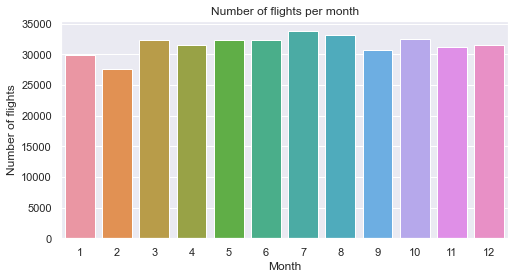

In [ ]:
display_bar_char('Month', 'Number of flights', monthFreqDf, 'v', (8, 4), "Number of flights per month")

&rightarrow; July is the busiest month of the year. This is reasonable since a lot of people go on vacation during the summer. It's interesting to see that February has significantly less flights than other months.

### 5.12 Relationship between Month and Delay
#### On departure

In [ ]:
depDelayFreqByMonth = airline_df.groupby('Month')['IsDepDelay'].sum().reset_index(name = 'Total Flights')
depDelayFreqByMonth

,Month,Total Flights
0,1,11072
1,2,10265
2,3,11733
3,4,10696
4,5,11899
5,6,13495
6,7,13448
7,8,12406
8,9,8876
9,10,10422


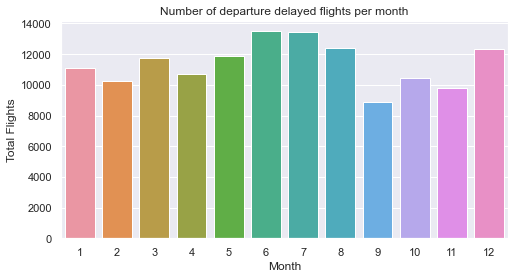

In [ ]:
display_bar_char('Month', 'Total Flights', depDelayFreqByMonth, 'v', (8, 4), "Number of departure delayed flights per month")

&rightarrow; Since the height of columns are different, there's a relationship between month whether a flight delay departure. We can see that September and February have the least number of flights delayed departure while March, July and December have the most number of flights delayed departure.

#### On arrival

In [ ]:
arrDelayFreqByMonth = airline_df.groupby('Month')['IsArrDelay'].sum().reset_index(name = 'Total Flights')
arrDelayFreqByMonth

,Month,Total Flights
0,1,11156
1,2,10431
2,3,11923
3,4,10962
4,5,11713
5,6,13517
6,7,13196
7,8,12607
8,9,9261
9,10,10725


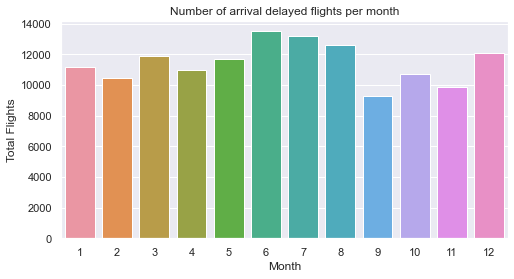

In [ ]:
display_bar_char('Month', 'Total Flights', arrDelayFreqByMonth, 'v', (8, 4), "Number of arrival delayed flights per month")

&rightarrow; This graph looks verry similar to the "Number of departure delayed flights per month" which suggests that there's a strong relationship between departure delay and arrival delay.

### 5.13 Relationship between hour and median delay in minutes? 
#### On departure

Here, an updated airline_df was imported in order to reduce the effort of running the whole preprocessing steps every time new analysis  is added to the notebook. The updated dataset is basically the original airline dataset after the preprocessing stage.

In [ ]:
airline_df["Scheduled_Departure_Hour"] = airline_df["Scheduled_Departure"]//100
airline_df["Scheduled_Departure_Hour"]

0         19
1          9
2         19
3         15
4          6
          ..
378952    15
378953     7
378954    13
378955    10
378956    10
Name: Scheduled_Departure_Hour, Length: 378957, dtype: int64

In [ ]:
airline_df_depdelay_by_hour = airline_df.groupby(["Scheduled_Departure_Hour"])[["DepDelayMinutes"]].median().reset_index()
airline_df_depdelay_by_hour

,Scheduled_Departure_Hour,DepDelayMinutes
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


Obviously, the real medians don't tell us much about the relationship that we are trying to explore. The reason why the medians are dominated by 0s is because most of the flights were on time of their departures. Let's not take the on-time flights into consideration.

In [ ]:
airline_df_depdelay_by_hour = airline_df[airline_df["DepDelayMinutes"]!=0].groupby(["Scheduled_Departure_Hour"])[["DepDelayMinutes"]].median().reset_index()
airline_df_depdelay_by_hour

,Scheduled_Departure_Hour,DepDelayMinutes
0,0,15.0
1,1,12.0
2,2,13.0
3,3,35.0
4,4,50.0
5,5,8.0
6,6,8.0
7,7,11.0
8,8,11.0
9,9,12.0


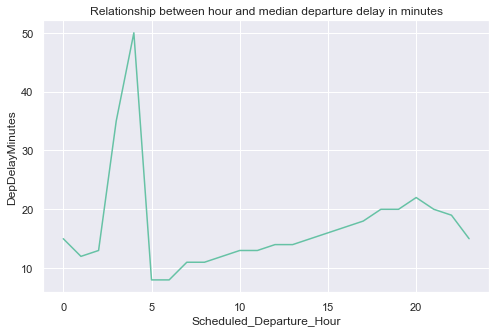

In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(airline_df_depdelay_by_hour.Scheduled_Departure_Hour.values, airline_df_depdelay_by_hour.DepDelayMinutes.values)
plt.xlabel("Scheduled_Departure_Hour")
plt.ylabel("DepDelayMinutes")
plt.title("Relationship between hour and median departure delay in minutes")
plt.show()

An interesting pattern can be observed in the line chart. The median departure delay peaked at ~50 minutes at 4am every day on average. The rise can actually be seen starting from 3am which stood at ~35 minutes in delay. It was odd that the median delay was only slightly above 10 minutes at 2am, but rocketed to nearly an hour just two hours later. What was even more bizzare was that the median delay in time dropped instantly to right below 10 minutes at 5pm. The significant delay in departure flights lasted for 2 hours in the early morning, possibly indicating a busy time window where most flights took place. For the rest of day, the delay time gradually increased and topped at above 20 minutes at 8pm before going down to ~15 minutes of delay per flight at the end of the day.

#### On arrival

In [ ]:
airline_df["Scheduled_Arrival_Hour"] = airline_df["Scheduled_Arrival"]//100
airline_df["Scheduled_Arrival_Hour"]

0         20
1         11
2         21
3         16
4          7
          ..
378952    17
378953     8
378954    15
378955    11
378956    12
Name: Scheduled_Arrival_Hour, Length: 378957, dtype: int64

In [ ]:
airline_df_arrdelay_by_hour = airline_df.groupby(["Scheduled_Arrival_Hour"])[["ArrDelayMinutes"]].median().reset_index()

Again, our focus should be the flights that were not on time, so let's reuse our method in Section 21.

In [ ]:
airline_df_arrdelay_by_hour = airline_df[airline_df["ArrDelayMinutes"]!=0].groupby(["Scheduled_Arrival_Hour"])[["ArrDelayMinutes"]].median().reset_index()
airline_df_arrdelay_by_hour

,Scheduled_Arrival_Hour,ArrDelayMinutes
0,0,22.0
1,1,23.0
2,2,17.5
3,3,25.0
4,4,20.0
5,5,15.0
6,6,11.0
7,7,10.0
8,8,11.0
9,9,11.0


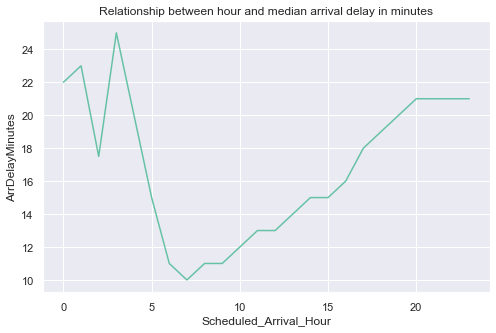

In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(airline_df_arrdelay_by_hour.Scheduled_Arrival_Hour.values, airline_df_arrdelay_by_hour.ArrDelayMinutes.values)
plt.xlabel("Scheduled_Arrival_Hour")
plt.ylabel("ArrDelayMinutes")
plt.title("Relationship between hour and median arrival delay in minutes")
plt.show()

This line chart shares some common patterns with the line chart of section 21. Both indicates 3-4am to be the peak time window of the day when the median delay time topped for both departure and arrival flights. However, there are still recognizable differences. For arrival flights, the median delay time reached bottom at 7am instead of 5am. Also, the peak delay time for arrival flights was 25 minutes, which is only one half of that of departure flights. The minutes gradually increased from 7am to 8pm, standing still at 21 minutes for the rest of the day.

### 5.14 Relationship between day of the week and median delay in minutes?
#### On arrival

In order to extract the day-of-the-week for the flights, we will be using the "FlightDate" column.

In [ ]:
# Convert to datetime
airline_df.FlightDate = pd.to_datetime(airline_df.FlightDate)
airline_df.FlightDate

0        2019-06-11
1        2018-04-10
2        2019-10-01
3        2018-07-27
4        2019-03-04
            ...    
378952   2014-06-09
378953   2014-03-09
378954   2014-03-30
378955   2014-07-23
378956   2014-11-22
Name: FlightDate, Length: 378957, dtype: datetime64[ns]

In [ ]:
# Convert to day-of-the-week
airline_df["Day_Of_The_Week"] = airline_df.FlightDate.dt.day_name()
airline_df["Day_Of_The_Week"]

0           Tuesday
1           Tuesday
2           Tuesday
3            Friday
4            Monday
            ...    
378952       Monday
378953       Sunday
378954       Sunday
378955    Wednesday
378956     Saturday
Name: Day_Of_The_Week, Length: 378957, dtype: object

In [ ]:
airline_df_arrdelay_by_day = airline_df.groupby(["Day_Of_The_Week"])[["ArrDelayMinutes"]].median().reset_index()
airline_df_arrdelay_by_day = airline_df[airline_df["ArrDelayMinutes"]!=0].groupby(["Day_Of_The_Week"])[["ArrDelayMinutes"]].median().reset_index()

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
airline_df_arrdelay_by_day = airline_df_arrdelay_by_day.groupby(['Day_Of_The_Week']).sum().reindex(cats)
airline_df_arrdelay_by_day

,ArrDelayMinutes
Day_Of_The_Week,
Monday,17.0
Tuesday,15.0
Wednesday,15.0
Thursday,17.0
Friday,16.0
Saturday,15.0
Sunday,16.0


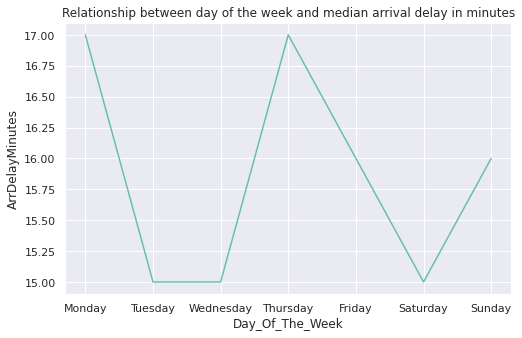

In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(airline_df_arrdelay_by_day.index.values, airline_df_arrdelay_by_day.ArrDelayMinutes.values)
plt.xlabel("Day_Of_The_Week")
plt.ylabel("ArrDelayMinutes")
plt.title("Relationship between day of the week and median arrival delay in minutes")
plt.show()

Monday and Thursday witnessed a median delay of 17 minutes which was the highest in the whole week. Sunday's flights had a median arrival delay of 16 minutes. Tuesday, Wednesday, and Saturday shows the lowest minutes: 15 minutes. Overall, Monday and Thursday seemed to be the busiest days of the week where flights tend to arrive with a high delay.

 ### 5.15 Difference between arrival delay (minutes) and departure delay (minutes) for every flight? 

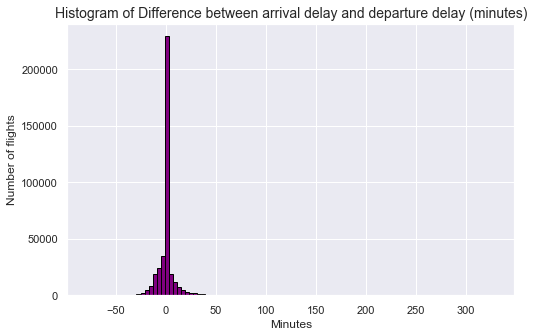

In [ ]:
airline_df["ArrDeDelayDifferenceMinutes"] = airline_df["ArrDelayMinutes"] - airline_df["DepDelayMinutes"]

# Plotting
plt.figure(figsize=(8, 5))
plt.hist(airline_df["ArrDeDelayDifferenceMinutes"].values, color='purple', edgecolor='black', bins=100)
plt.title('Histogram of Difference between arrival delay and departure delay (minutes)', size=14)
plt.xlabel('Minutes', size=12)
plt.ylabel('Number of flights', size=12)
# plt.rcParams["font.size"] = 12
plt.show()

As we can see from the historgarm, most of the differences are 0 minutes. In other words, for most flights, there were no differences between their arrival delay minutes and departure delay minutes. In order to extend our views on the flights that actually had a difference between their two attributes, let's look at a histogram without the 0s.

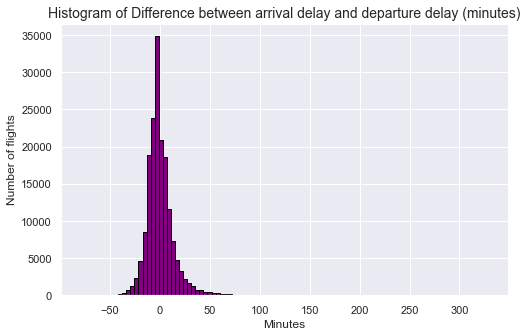

In [ ]:
airline_arr_delay_difference_minutes_non_zero = [diff for diff in airline_df["ArrDeDelayDifferenceMinutes"].tolist() if diff != 0]
# Drop the NaN values
airline_arr_delay_difference_minutes_non_zero = [diff for diff in airline_arr_delay_difference_minutes_non_zero if np.isnan(diff)==False]

# Plotting
plt.figure(figsize=(8, 5))
plt.hist(airline_arr_delay_difference_minutes_non_zero, color='purple', edgecolor='black', bins=100)
plt.title('Histogram of Difference between arrival delay and departure delay (minutes)', size=14)
plt.xlabel('Minutes', size=12)
plt.ylabel('Number of flights', size=12)
plt.show()

Still, it is hard to generate any insights based on this histogram, which is obviously zoomed out significantly because of an outlier. Let's see what the outlier is.

In [ ]:
max(airline_arr_delay_difference_minutes_non_zero)

328.0

Let's temporarily leave this outlier out of our scope for the plotting in order to take a better look into the clustered range.

In [ ]:
airline_arr_delay_difference_minutes_non_zero.remove(max(airline_arr_delay_difference_minutes_non_zero))
max(airline_arr_delay_difference_minutes_non_zero)

243.0

243 should still be considered an outlier, so let's remove that as well. In order to efficiently remove the outliers so that we don't have to do this repeatedly, let's quickly build a function to recursively remove the max value of the list until it reaches an acceptable range. According to the above histogram, let's remove the max until it reaches 100 minutes.

In [ ]:
def recursively_remove_max(arr_delay_list):
    if max(arr_delay_list) <= 100:
        return arr_delay_list
    arr_delay_list.remove(max(arr_delay_list))
    recursively_remove_max(arr_delay_list)

airline_arr_delay_difference_minutes_non_zero = recursively_remove_max(airline_arr_delay_difference_minutes_non_zero)
max(airline_arr_delay_difference_minutes_non_zero)

Let's plot again.

In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.hist(airline_arr_delay_difference_minutes_non_zero, color='purple', edgecolor='black', bins=100)
plt.title('Histogram of Difference between arrival delay and departure delay (minutes)', size=14)
plt.xlabel('Minutes', size=12)
plt.ylabel('Number of flights', size=12)
plt.show()

Much better now. We can see that most of the differences between arrival and departure delay time fell into between -10 and 10 minutes. There were extreme flights where the difference ranged from one hour to a couple hours, including the outliers that we just removed. Looking from a higher level, the overall absolute difference was around 30 minutes.

### 5.16 Relationship between taxi in/taxi out and delay?
#### On departure

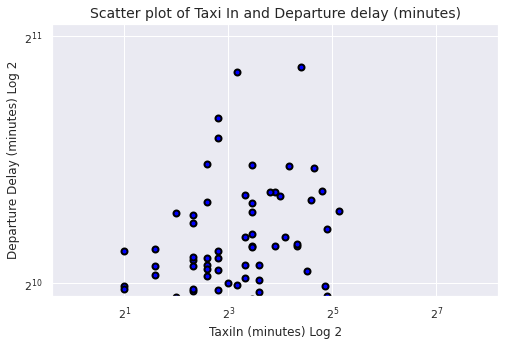

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(x=airline_df.TaxiIn, y=airline_df.DepDelayMinutes, c='blue', linewidths = 2, edgecolor='black')
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.title('Scatter plot of Taxi In and Departure delay (minutes)', size=14)
plt.xlabel('TaxiIn (minutes) Log 2', size=12)
plt.ylabel('Departure Delay (minutes) Log 2', size=12)
plt.autoscale()
plt.show()

#### On arrival

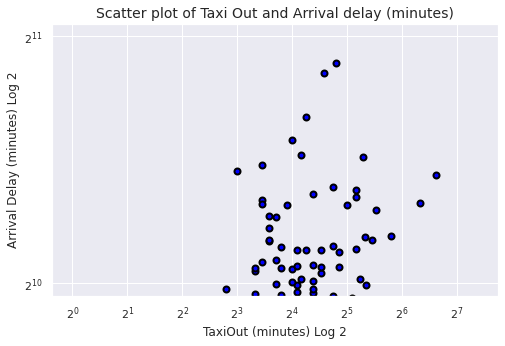

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(x=airline_df.TaxiOut, y=airline_df.ArrDelayMinutes, c='blue', linewidths = 2, edgecolor='black')
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.title('Scatter plot of Taxi Out and Arrival delay (minutes)', size=14)
plt.xlabel('TaxiOut (minutes) Log 2', size=12)
plt.ylabel('Arrival Delay (minutes) Log 2', size=12)
plt.autoscale()
plt.show()

#### Observation

The only significant similarity that we can draw from the two scatter plots is that there is no recognizable pattern between the two pairs of attributes. The Taxi In and Taxi Out time seemed to not have a direct relationship with flight delay minutes. Spending a slightly longer time on the runway doesn't necessarily mean the flight will either depart or arrive later than the intended time.